In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split as tts

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
data = pd.read_csv('prediction_sutdent_performance.csv')

In [4]:
data.head()

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
0,0.96,3.40,8.20,53.00,47.00
1,0.86,3.20,5.90,55.00,35.00
2,0.68,3.20,9.30,41.00,32.00
3,0.26,3.20,8.20,47.00,34.00
4,0.60,3.80,10.00,75.00,33.00


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1388 entries, 0 to 1387
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Socioeconomic Score  1388 non-null   float64
 1   Study Hours          1388 non-null   float64
 2   Sleep Hours          1388 non-null   float64
 3   Attendance (%)       1388 non-null   float64
 4   Grades               1388 non-null   float64
dtypes: float64(5)
memory usage: 54.3 KB


In [6]:
data.isna().any()

Socioeconomic Score    False
Study Hours            False
Sleep Hours            False
Attendance (%)         False
Grades                 False
dtype: bool

In [7]:
data.duplicated().any()

False

In [8]:
df_study_hr_grade = data[['Grades', 'Attendance (%)']]

In [9]:
df_study_hr_grade

,Grades,Attendance (%)
0,47.00,53.00
1,35.00,55.00
2,32.00,41.00
3,34.00,47.00
4,33.00,75.00
...,...,...
1383,41.00,51.00
1384,37.00,63.00
1385,36.00,54.00
1386,34.00,61.00


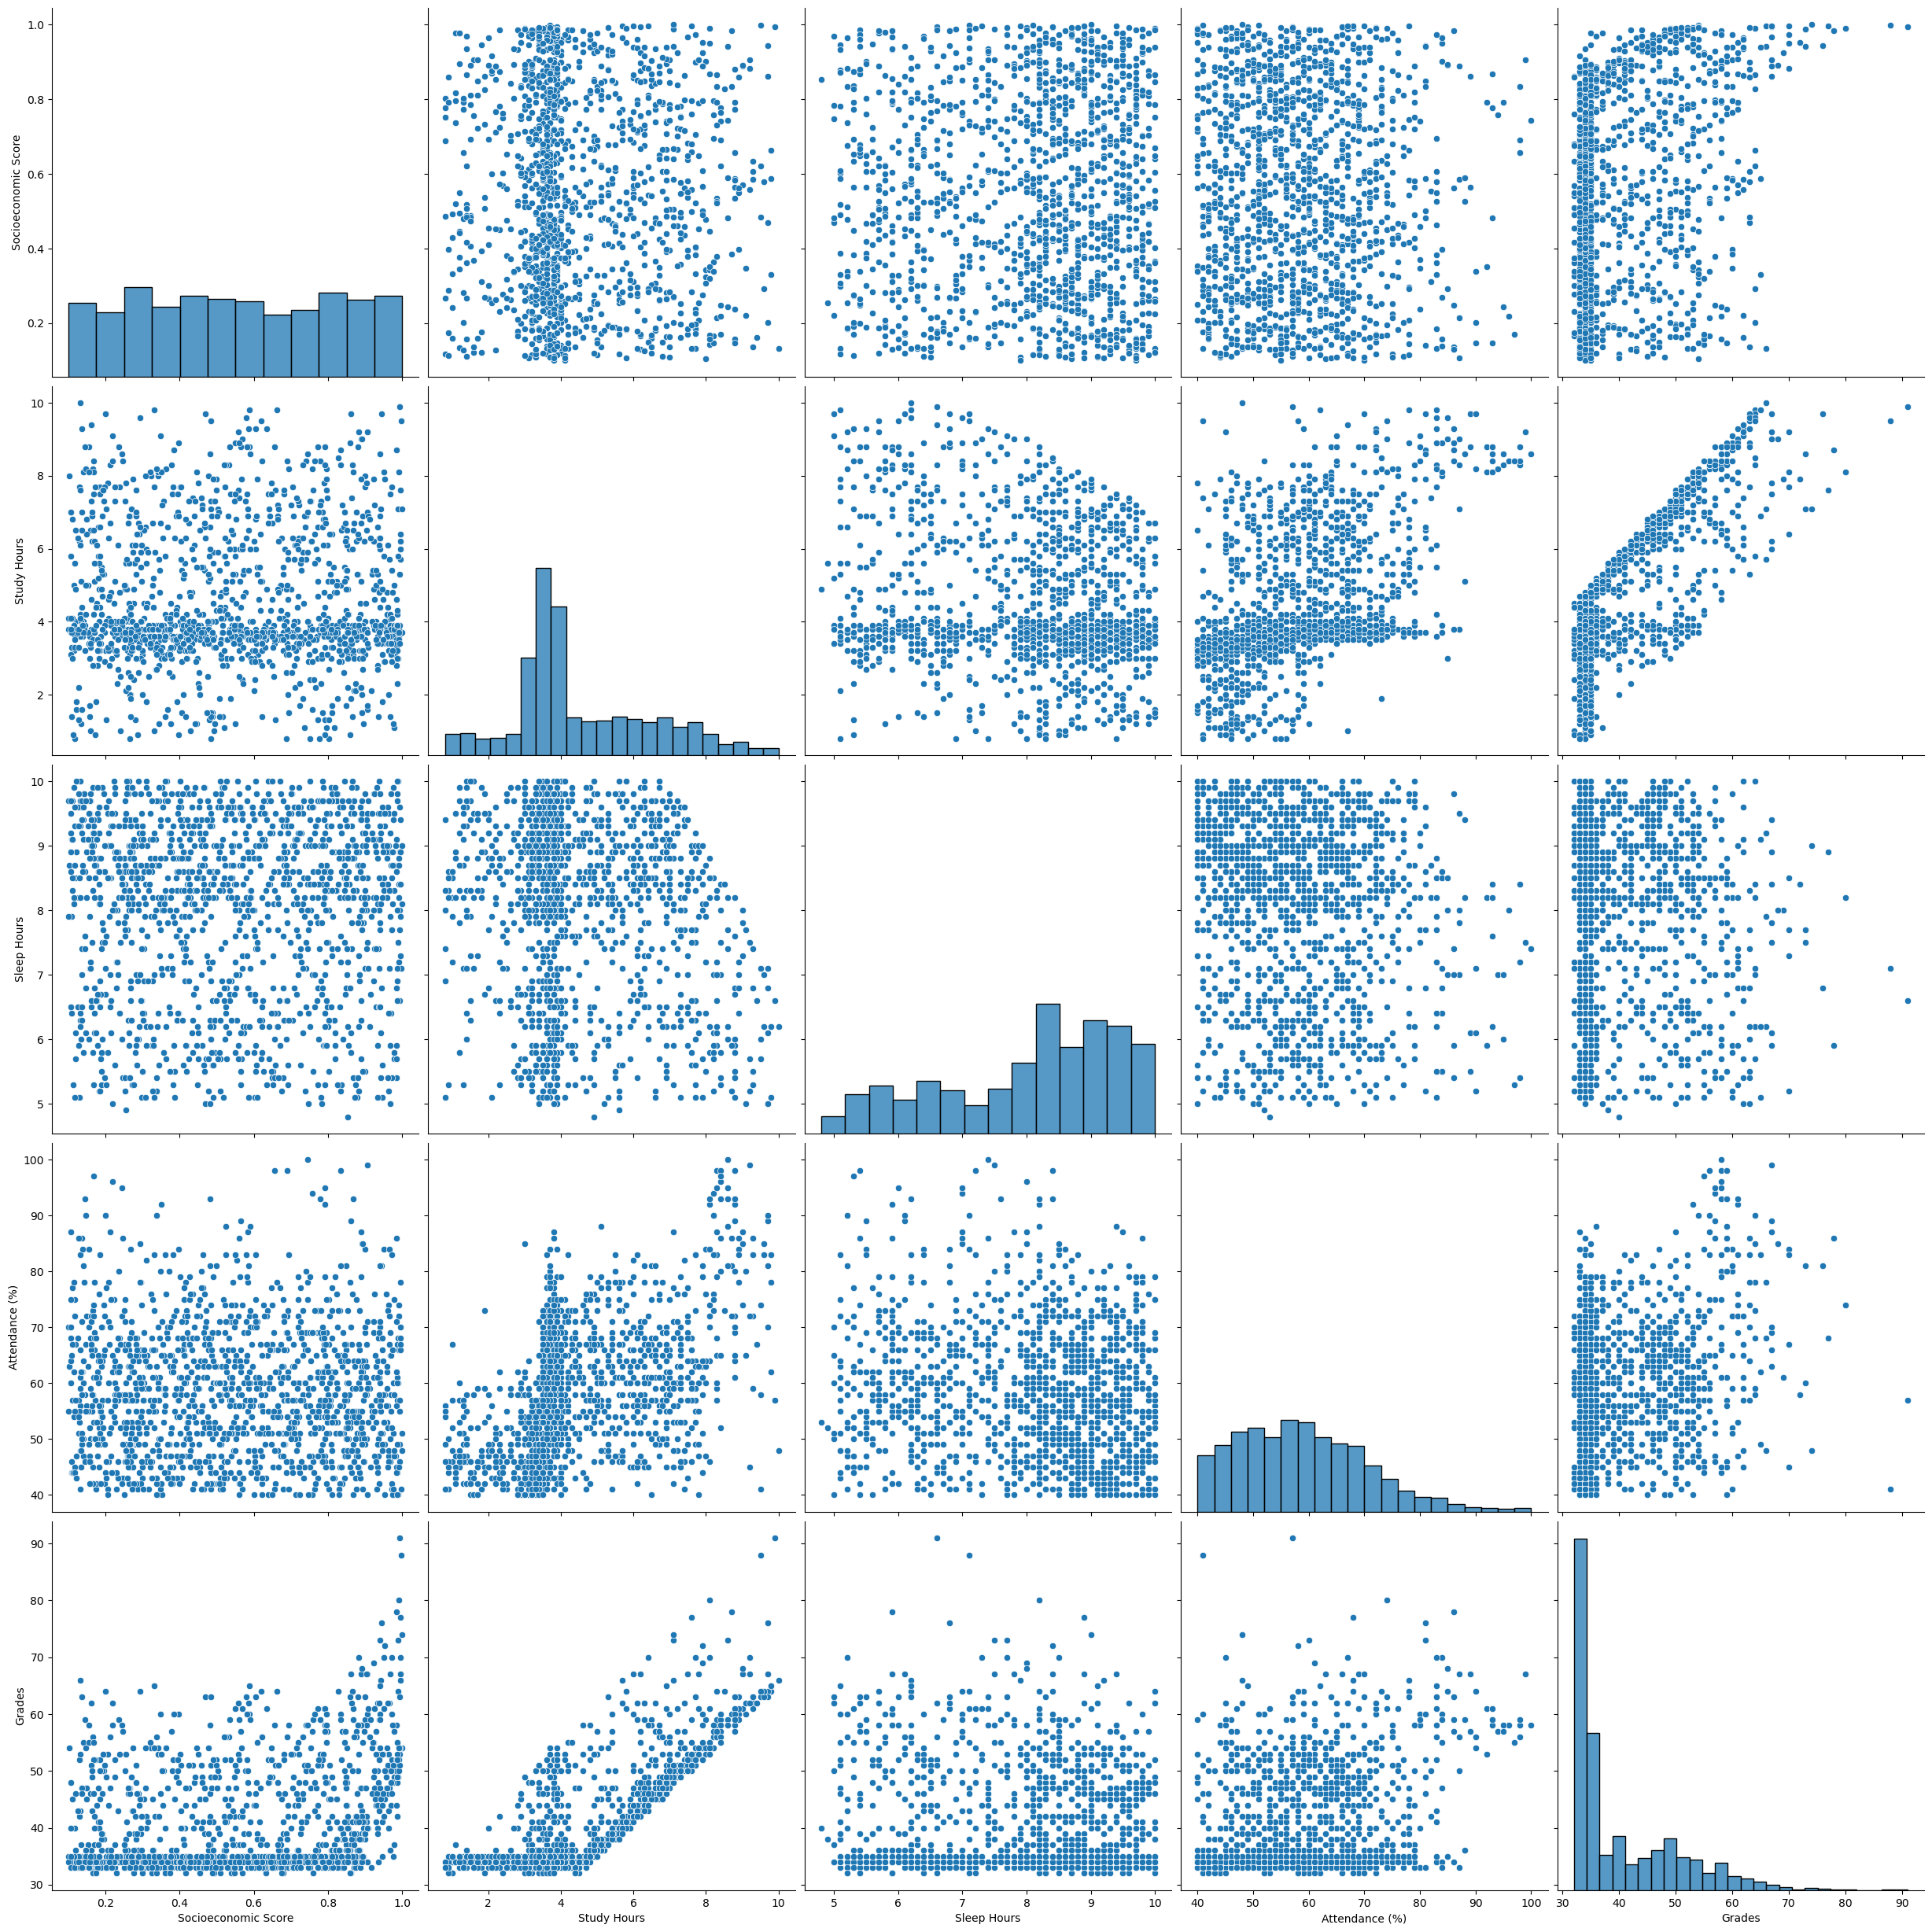

In [10]:
sns.pairplot(data, height=5)
plt.show()

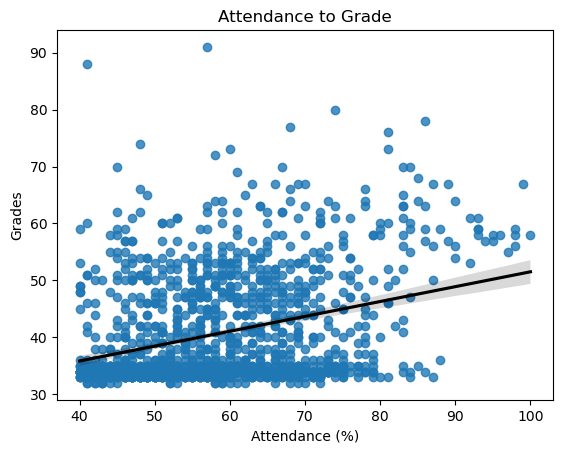

In [11]:
sns.regplot(df_study_hr_grade, x='Attendance (%)', y='Grades', line_kws={'color': 'black'})
plt.title('Attendance to Grade')
plt.show()

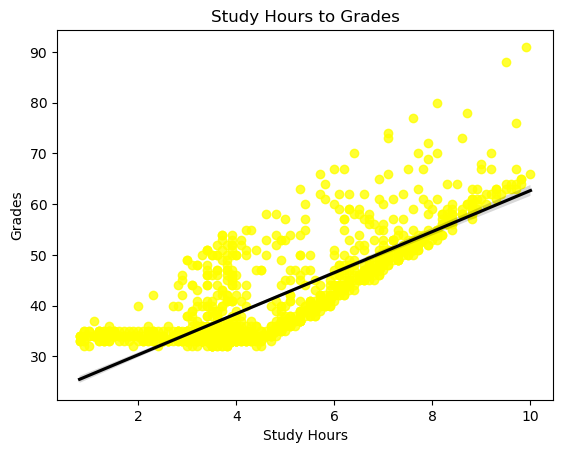

In [12]:
sns.regplot(data=data, x='Study Hours', y='Grades', color='yellow', line_kws={'color': 'black'})
plt.title('Study Hours to Grades')
plt.show()

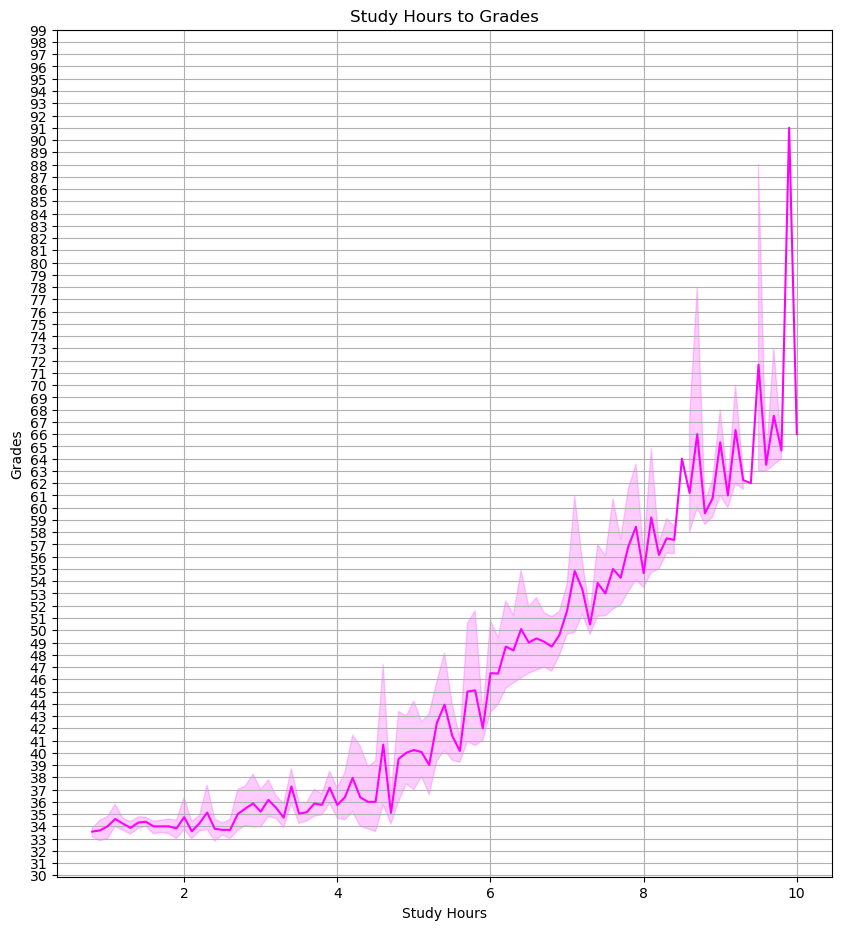

In [13]:
plt.figure(figsize=(10,11))
plt.grid()
ax1 = plt.gca()
sns.lineplot(data=data, x='Study Hours', y='Grades', color='magenta')
plt.title('Study Hours to Grades')
ax1.set_yticks(np.arange(30, 100, 1))
plt.show()

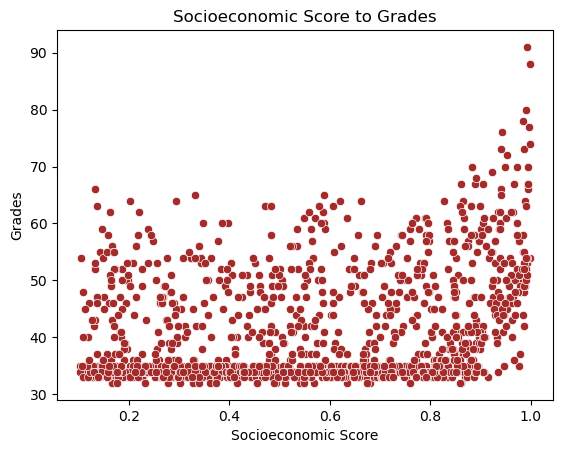

In [14]:
sns.scatterplot(data=data, x='Socioeconomic Score', y='Grades', color='brown')
plt.title('Socioeconomic Score to Grades')
plt.show()

In [15]:
regression = LinearRegression()

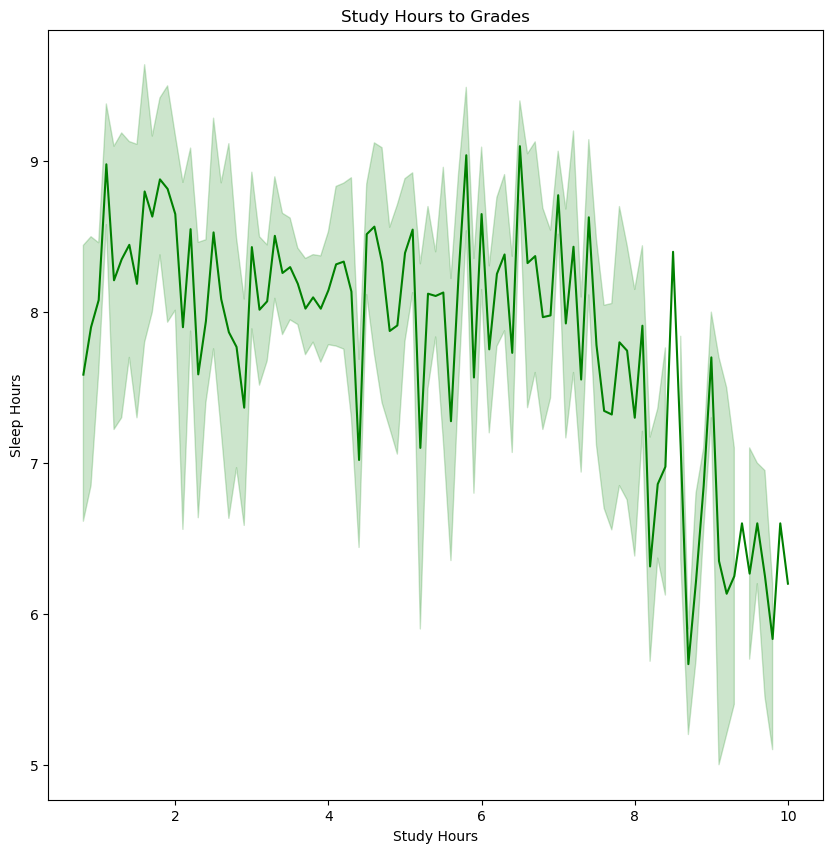

In [16]:
plt.figure(figsize=(10, 10))
sns.lineplot(data=data, x='Study Hours', y='Sleep Hours', color='green')
plt.title('Study Hours to Grades')
plt.show()

In [17]:
target = data['Grades']

In [18]:
feature = data.drop('Grades', axis=1)

In [19]:
regression.fit(feature, target)

LinearRegression()

In [20]:
regression.score(feature, target)*100

77.42675840954024

In [21]:
X_train, X_test, y_train, y_test = tts(feature, target)

In [22]:
regression.score(X_train, y_train)*100

76.85123608746747

In [23]:
predict = regression.predict(X_train)
residuals = (y_train - predict)

In [24]:
mean = residuals.mean()
skew = residuals.skew()

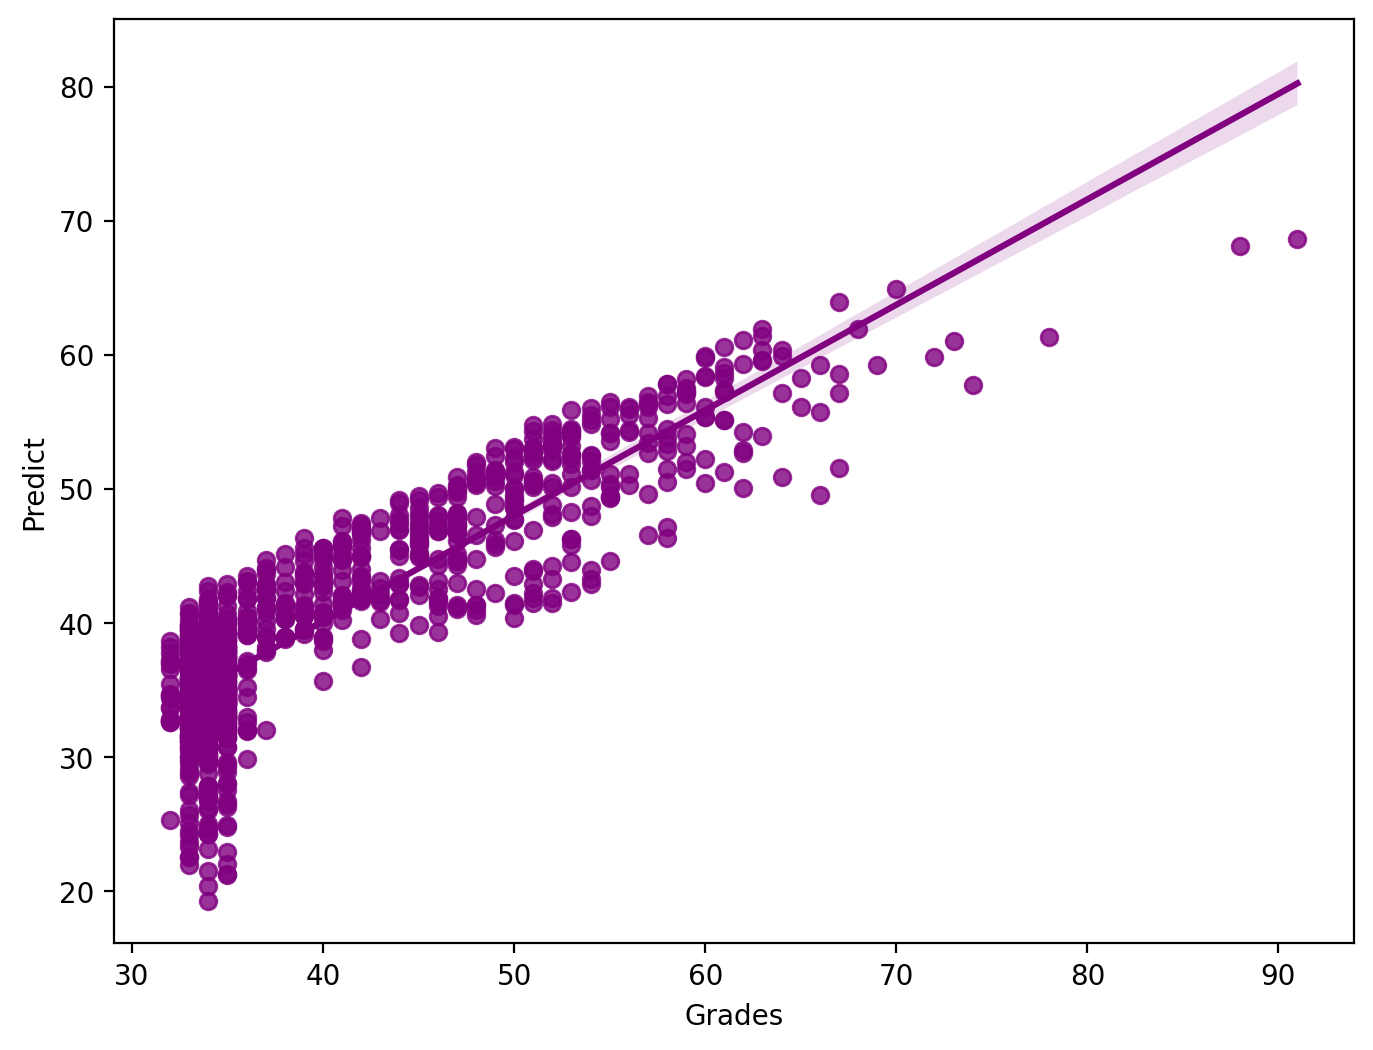

In [25]:
plt.figure(figsize=(8, 6), dpi=200)
sns.regplot(x=y_train, y=predict, color='purple')
plt.ylabel('Predict')
plt.show()

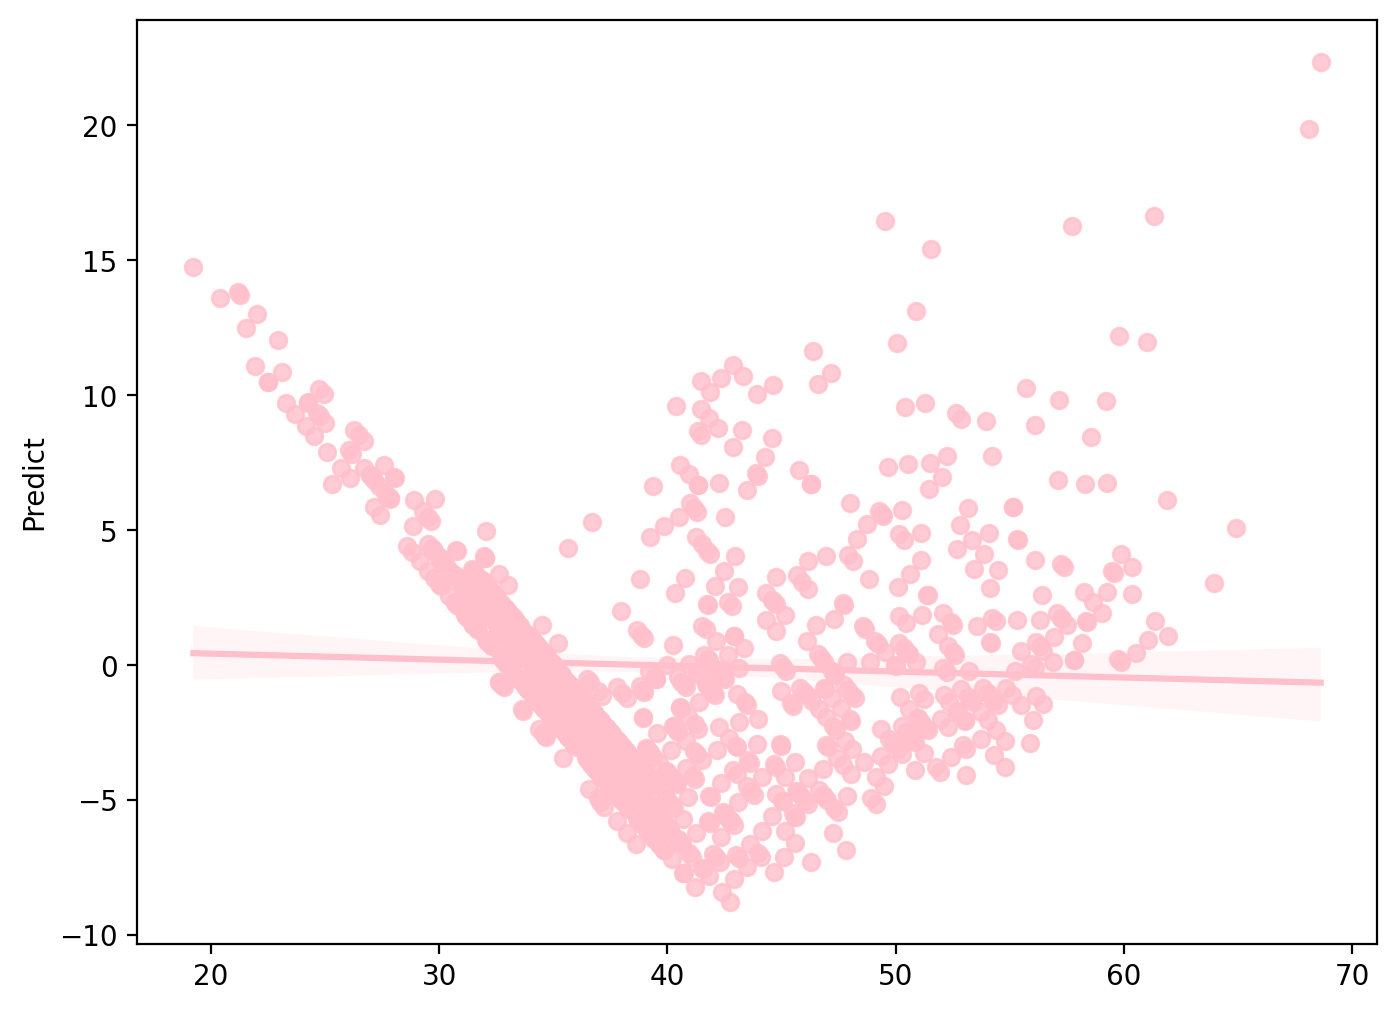

In [26]:
plt.figure(figsize=(8, 6), dpi=200)
sns.regplot(x=predict, y=residuals, color='pink')
plt.ylabel('Predict')
plt.show()

<Figure size 1600x1200 with 0 Axes>

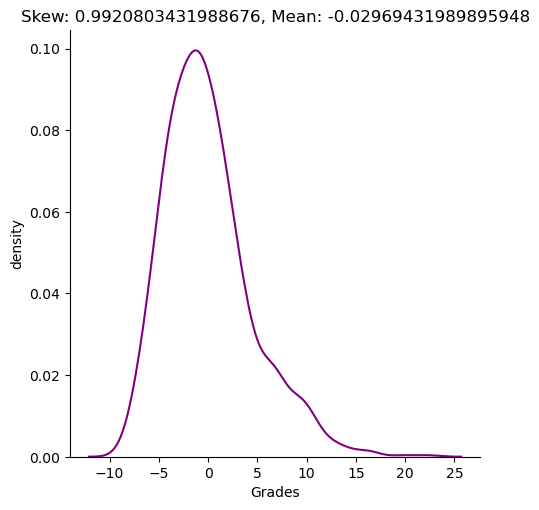

In [27]:
plt.figure(figsize=(8, 6), dpi=200)
sns.displot(x=residuals, color='purple', kind='kde')
plt.title(f'Skew: {skew}, Mean: {mean}')
plt.ylabel('density')
plt.show()

In [28]:
log_grade = np.log(data.Grades)

In [29]:
X_train, X_test, y_log_train, y_log_test = tts(feature, log_grade, random_state=10, train_size=0.8)

In [30]:
log_regress = LinearRegression()

In [31]:
log_regress.fit(X_train, y_log_train)

LinearRegression()

In [32]:
log_regress.score(X_train, y_log_train)*100

78.29850600824761

In [33]:
log_pred = regression.predict(X_train)

In [34]:
log_res = (y_log_train - log_pred)

In [35]:
print(log_res.mean())

-37.025430970175634


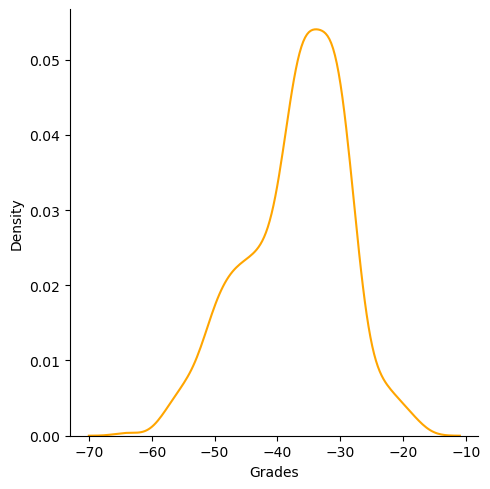

In [36]:
sns.displot(log_res, color='orange', kind='kde')
plt.show()

<h1>Prediction:</h1>

In [38]:
data

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
0,0.96,3.40,8.20,53.00,47.00
1,0.86,3.20,5.90,55.00,35.00
2,0.68,3.20,9.30,41.00,32.00
3,0.26,3.20,8.20,47.00,34.00
4,0.60,3.80,10.00,75.00,33.00
...,...,...,...,...,...
1383,0.45,5.50,8.00,51.00,41.00
1384,0.52,4.90,6.50,63.00,37.00
1385,0.88,3.90,6.20,54.00,36.00
1386,0.47,3.50,7.30,61.00,34.00


In [39]:
feature['Attendance (%)'] = 90
feature['Sleep Hours'] = 6
feature['Study Hours'] = 7

In [40]:
feature_av = feature.mean().values

In [41]:
feature_stats = pd.DataFrame(data=feature_av.reshape(1, len(feature.columns)), columns=feature.columns)

In [42]:
feature_stats

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%)
0,0.55,7.00,6.00,90.00


In [43]:
estimate = regression.predict(feature_stats)

In [44]:
estimate[0]

48.66241200326924